In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, recall_score, precision_score

In [2]:
!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE

In [25]:
!pip install catboost
from catboost import CatBoostClassifier

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 24.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 kB 4.5 MB/s eta 0:00:00


In [3]:
# from google.colab import files
# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
# файлы импортируются из гугл диска
# creditcard = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/files/creditcard.csv')

In [5]:
# файлы импортируются с компьютера
creditcard = pd.read_csv('creditcard.csv')

In [6]:
creditcard.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [7]:
creditcard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
creditcard.shape

(284807, 31)

In [9]:
creditcard.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

<Axes: >

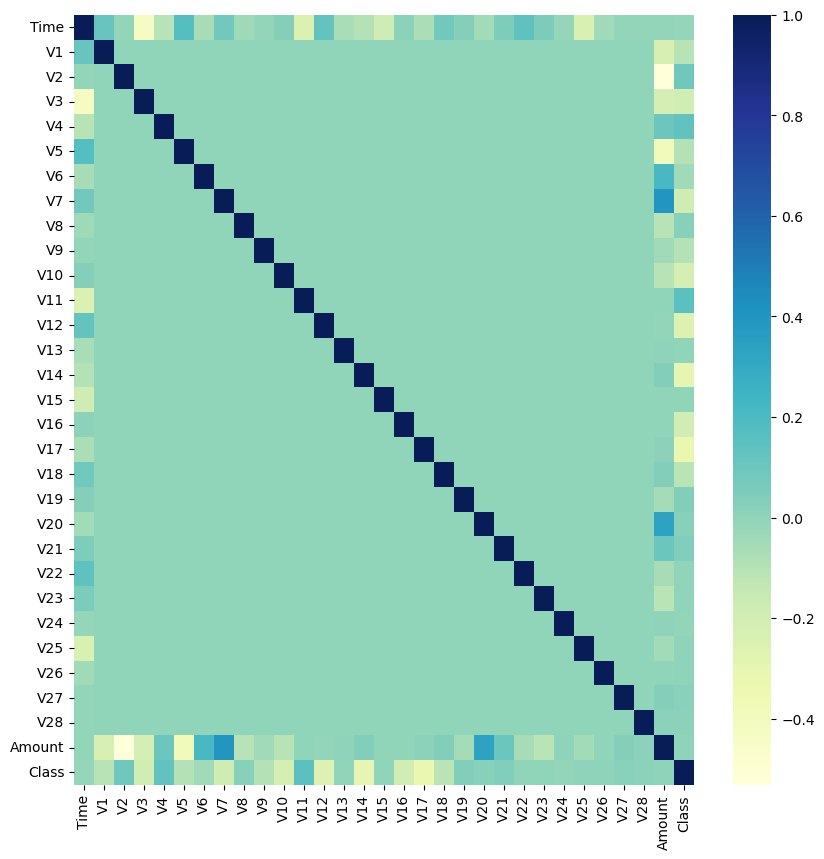

In [10]:
plt.figure(figsize=(10,10))
corr = creditcard.corr()
sns.heatmap(corr, cmap = "YlGnBu")

In [11]:
correlated_features = set()

for i in range(len(corr.columns)):
    for j in range(i):
        if abs(corr.iloc[i, j]) > 0.01:
            colname = corr.columns[i]
            correlated_features.add(colname)

print(len(correlated_features))
print(correlated_features)

27
{'V24', 'V5', 'V19', 'V7', 'V14', 'V2', 'V21', 'V16', 'V26', 'V22', 'V6', 'V1', 'V25', 'V13', 'V8', 'V15', 'V4', 'V17', 'Class', 'Amount', 'V10', 'V11', 'V20', 'V23', 'V12', 'V18', 'V3'}


In [12]:
X = creditcard.drop(columns=['Class'])
y = creditcard['Class']

In [13]:
os = SMOTE(random_state = 123, k_neighbors = 25)

column = X.columns
test = creditcard.columns

X_os, y_os = os.fit_resample(X, y)
X_os = pd.DataFrame(data = X_os, columns = column)
y_os = pd.DataFrame(data = y_os, columns = ['Class'])

creditcard_os = pd.DataFrame(data = X_os, columns = test)

print(X_os.shape, y_os.shape)
y_os.value_counts()

(568630, 30) (568630, 1)


Class
0        284315
1        284315
dtype: int64

<Axes: >

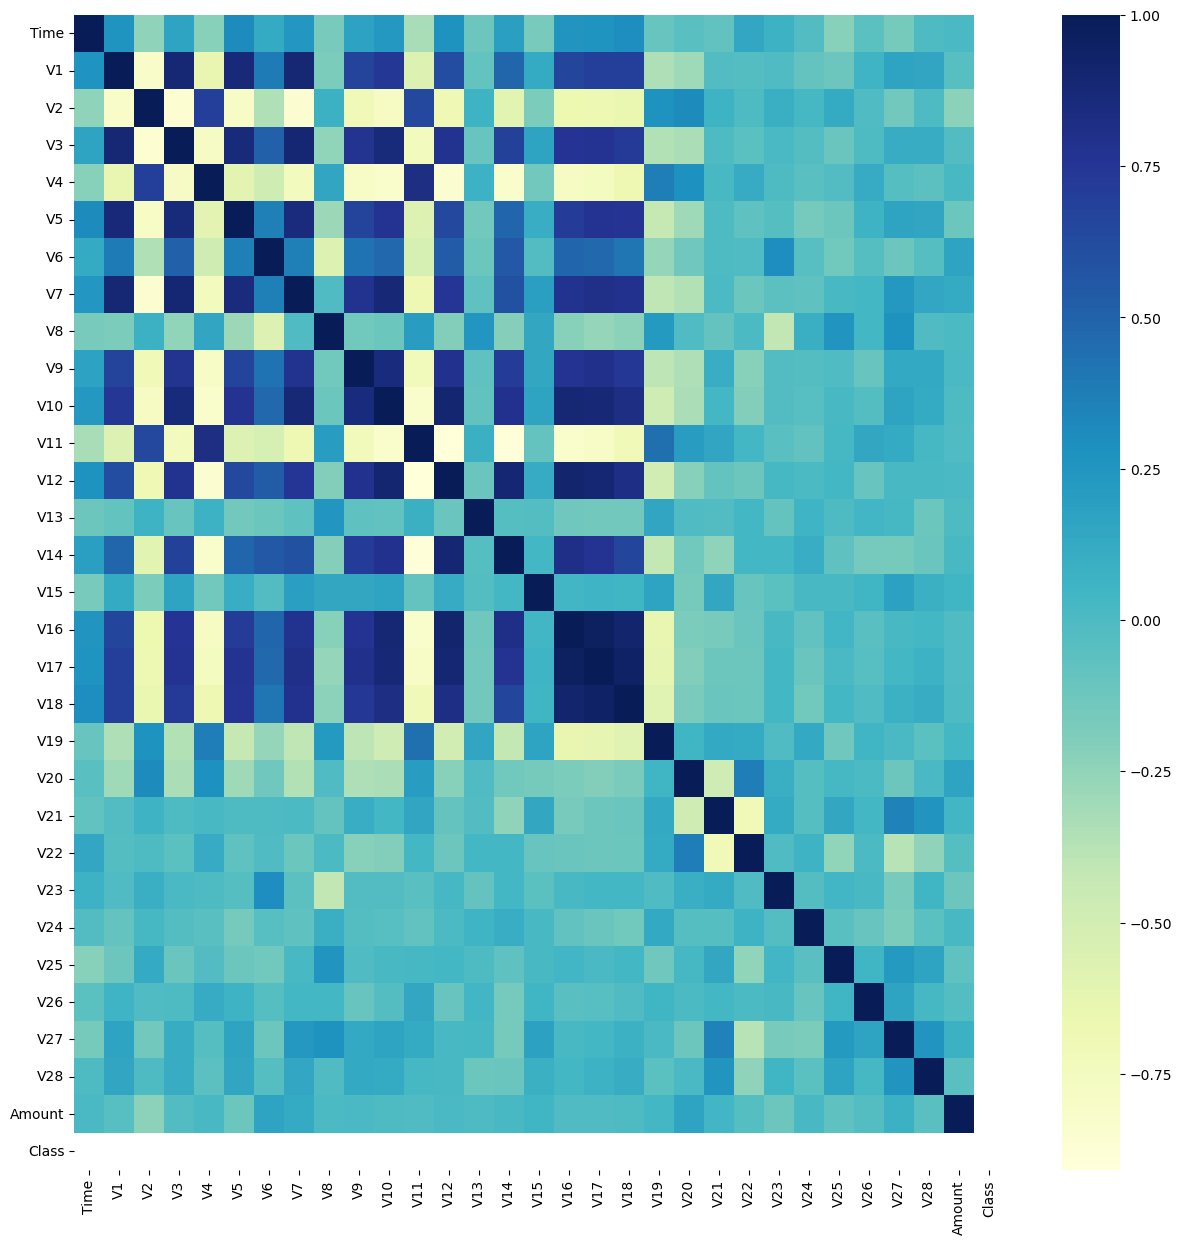

In [14]:
plt.figure(figsize=(15,15))
corr = creditcard_os.corr()
sns.heatmap(corr, cmap = "YlGnBu")

In [15]:
correlated_features = set()

for i in range(len(corr.columns)):
    for j in range(i):
        if abs(corr.iloc[i, j]) > 0.7:
            colname = corr.columns[i]
            correlated_features.add(colname)

print(len(correlated_features))
print(correlated_features)

14
{'V7', 'V14', 'V2', 'V9', 'V12', 'V4', 'V16', 'V22', 'V18', 'V17', 'V5', 'V3', 'V10', 'V11'}


In [16]:
X_os = X_os[list(correlated_features)]
X_os

,V7,V14,V2,V9,V12,V4,V16,V22,V18,V17,V5,V3,V10,V11
0,0.239599,-0.311169,-0.072781,0.363787,-0.617801,1.378155,-0.470401,0.277838,0.025791,0.207971,-0.338321,2.536347,0.090794,-0.551600
1,-0.078803,-0.143772,0.266151,-0.255425,1.065235,0.448154,0.463917,-0.638672,-0.183361,-0.114805,0.060018,0.166480,-0.166974,1.612727
2,0.791461,-0.165946,-1.340163,-1.514654,0.066084,0.379780,-2.890083,0.771679,-0.121359,1.109969,-0.503198,1.773209,0.207643,0.624501
3,0.237609,-0.287924,-0.185226,-1.387024,0.178228,-0.863291,-1.059647,0.005274,1.965775,-0.684093,-0.010309,1.792993,-0.054952,-0.226487
4,0.592941,-1.119670,0.877737,0.817739,0.538196,0.403034,-0.451449,0.798278,-0.038195,-0.237033,-0.407193,1.548718,0.753074,-0.822843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568625,-1.388311,-5.372057,2.610742,-2.709672,-2.832774,5.307966,-0.730311,-0.121587,0.599473,0.709593,1.130779,-3.207583,-1.949727,0.801464
568626,-9.869908,-6.883882,3.156097,-3.867216,-7.056479,5.023684,-6.681150,1.253258,-4.034154,-11.384292,-4.129239,-7.383136,-7.613315,5.172280
568627,-3.733022,-7.423231,1.650258,-2.898127,-4.943861,4.383815,-3.003840,0.167449,-1.632431,-7.099265,-0.442760,-4.441795,-4.907986,3.467059
568628,-12.345563,-14.629153,5.267711,-6.234464,-13.402615,7.728912,-11.720289,0.144527,-7.756639,-21.043556,-7.962640,-11.528198,-12.587549,7.384305


In [17]:
X_os = pd.DataFrame(MinMaxScaler().fit_transform(X_os), columns = X_os.columns, index = X_os.index)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.35, random_state = 123)

Логистическая регрессия, случайный лес, дерево решений

Логистическая регрессия

In [19]:
model_0 = LogisticRegression()
model_0.fit(X_train, y_train)
pred_0 = model_0.predict(X_test)

/home/egor/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [20]:
print(accuracy_score(pred_0, y_test))
print(recall_score(pred_0, y_test))
print(precision_score(pred_0, y_test))

0.998966724516718
0.7359550561797753
0.7005347593582888


Дерево решений

In [21]:
model_1 = DecisionTreeClassifier()
model_1.fit(X_train, y_train)
pred_1 = model_1.predict(X_test)

In [22]:
print(accuracy_score(pred_1, y_test))
print(recall_score(pred_1, y_test))
print(precision_score(pred_1, y_test))

0.9991874241345063
0.7819148936170213
0.786096256684492


Случайный лес

In [23]:
param_grid = {'n_estimators' : range(10, 51, 10),
              'max_depth' : range(1, 13, 2),
              'min_samples_leaf' : range(1, 8),
              'min_samples_split': range(2, 10, 2)}

In [ ]:
clf = RandomForestClassifier(random_state = 42)
grid = GridSearchCV(clf, param_grid, cv=5)
grid.fit(X_train, y_train)

In [ ]:
grid.best_params_

{'max_depth': 11,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

In [ ]:
pred_2 = grid.predict(X_test)

In [ ]:
print(accuracy_score(pred_2, y_test))
print(recall_score(pred_2, y_test))
print(precision_score(pred_2, y_test))

0.9994883781587632
0.9473684210526315
0.7700534759358288


In [26]:
model_3 = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=3)
model_3.fit(X_train, y_train)

0:	learn: 0.3611301	total: 54.5ms	remaining: 5.4s
1:	learn: 0.2225939	total: 65.2ms	remaining: 3.19s
2:	learn: 0.1246825	total: 73.4ms	remaining: 2.37s
3:	learn: 0.0700771	total: 81.5ms	remaining: 1.96s
4:	learn: 0.0426119	total: 89.6ms	remaining: 1.7s
5:	learn: 0.0270945	total: 97.6ms	remaining: 1.53s
6:	learn: 0.0182988	total: 105ms	remaining: 1.4s
7:	learn: 0.0130823	total: 113ms	remaining: 1.3s
8:	learn: 0.0098661	total: 122ms	remaining: 1.24s
9:	learn: 0.0078737	total: 131ms	remaining: 1.18s
10:	learn: 0.0065586	total: 140ms	remaining: 1.13s
11:	learn: 0.0056685	total: 151ms	remaining: 1.11s
12:	learn: 0.0050880	total: 158ms	remaining: 1.06s
13:	learn: 0.0045397	total: 167ms	remaining: 1.02s
14:	learn: 0.0042080	total: 175ms	remaining: 993ms
15:	learn: 0.0039652	total: 183ms	remaining: 962ms
16:	learn: 0.0037375	total: 190ms	remaining: 930ms
17:	learn: 0.0036032	total: 199ms	remaining: 906ms
18:	learn: 0.0035024	total: 206ms	remaining: 879ms
19:	learn: 0.0034300	total: 218ms	remai

In [27]:
pred_3 = model_3.predict(X_test)

In [28]:
print(accuracy_score(pred_3, y_test))
print(recall_score(pred_3, y_test))
print(precision_score(pred_3, y_test))

0.9995686325652318
0.9615384615384616
0.8021390374331551
